### This notebook extracts features for the specified cnn model on the images from the Flicker8k dataset

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
import pandas as pd

import random
from tqdm import tqdm

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


please ensure the kaggle.json ( key file) is avialable in the location

In [ ]:
%cd /content/gdrive/My Drive/Kaggle/

/content/gdrive/My Drive/Kaggle


In [ ]:
! pip install -q kaggle

In [ ]:
! kaggle datasets download -d adityajn105/flickr8k

 98% 1.02G/1.04G [00:32<00:00, 48.8MB/s]
100% 1.04G/1.04G [00:32<00:00, 34.4MB/s]


### read the files

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  flickr8k.zip
replace Images/1000268201_693b08cb0e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: Images/2904601886_39e9d317b1.jpg  
  inflating: Images/2904997007_23d4b94101.jpg  
  inflating: Images/2905942129_2b4bf59bc0.jpg  
  inflating: Images/2905948395_ca3e6b3c9a.jpg  
  inflating: Images/2905975229_7c37156dbe.jpg  
  inflating: Images/2906054175_e33af79522.jpg  
  inflating: Images/290650302_ade636da35.jpg  
  inflating: Images/2906802485_dfebf09173.jpg  
  inflating: Images/2909811789_ed8f3fd972.jpg  
  inflating: Images/290982269_79fc9f36dc.jpg  
  inflating: Images/2909875716_25c8652614.jpg  
  inflating: Images/2909955251_4b326a46a7.jpg  
  inflating: Images/2910758605_73a3f5a5c2.jpg  
  inflating: Images/2911107495_e3cec16a24.jpg  
  inflating: Images/2911238432_33ec2d8cec.jpg  
  inflating: Images/2911245290_b2c79f328a.jpg  
  inflating: Images/2911552402_5166bc173b.jpg  
  inflating: Images/2911658792_6a6ef07e3a.jpg  


### preview the captions

In [ ]:
! head -5 captions.txt

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .


please note same image has multiple captions that collated as list against same image

In [ ]:
base_path = os.path.abspath('.')
qual_image_path = base_path+'/'+'Images'

In [ ]:
image_captions_df = pd.read_csv("captions.txt",sep=",",header=0)


A child in a pink dress is climbing up a set of stairs in an entry way .
A little girl climbing into a wooden playhouse .


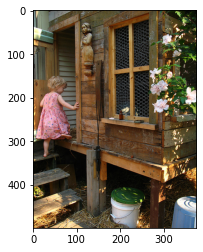

In [ ]:
print(image_captions_df['caption'][0])
print(image_captions_df['caption'][2])
plt.imshow(imread(qual_image_path+'/'+image_captions_df['image'][0]))

In [ ]:
unique_images=list(image_captions_df['image'].unique())

In [ ]:
len(unique_images)

8091

In [ ]:
# One of vgg16, InceptionV3, resnet
CNN_model_name="InceptionV3"

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras import Input
from tensorflow import io,image
import tensorflow as tf
from PIL import Image

In [ ]:
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array

### Extract the features based on the model and persist into shared drive

In [ ]:
from  keras.applications import vgg16,inception_v3

In [ ]:
def parse_image(image_path):
  if CNN_model_name=="vgg16":
    shape=(224,224)
  elif CNN_model_name=="resnet":
    shape= (224,224)
  elif CNN_model_name=="InceptionV3":
    shape=(299,299)

  img = io.read_file(qual_image_path+'/'+image_path)
  img = image.decode_jpeg(img, channels=3)
  img = image.resize(img, shape)
  return img, image_path

(299, 299, 3)


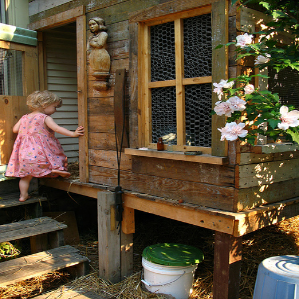

In [ ]:
test_image_array,test_path=parse_image(unique_images[0])
print(test_image_array.shape)
imagearray= np.asarray(test_image_array)
Image.fromarray((imagearray * 1).astype(np.uint8)).convert('RGB')

In [ ]:
def get_feature_extraction_model(input_shape):
  if CNN_model_name == 'vgg16':
    conv_base =keras.applications.vgg16.VGG16(weights = "imagenet" , include_top=False )
    feature_input = conv_base.input
    feature_output = conv_base.layers[-1].output
    image_feature_model = tf.keras.Model(feature_input, feature_output)
  elif CNN_model_name=="InceptionV3":
    conv_base = keras.applications.inception_v3.InceptionV3(include_top=False)
    feature_input = conv_base.input
    feature_output = conv_base.layers[-1].output
    image_feature_model = tf.keras.Model(feature_input, feature_output)
  elif CNN_model_name=="resnet":
    conv_base = keras.applications.resnet.ResNet50(weights = "imagenet", include_top=False,  input_shape=input_shape)
    feature_input = conv_base.input
    feature_output = conv_base.layers[-1].output
    image_feature_model = tf.keras.Model(feature_input, feature_output)     
  return image_feature_model

In [ ]:
def persist_features_from_batch(batch_features, batch_path):
  feature_dict = {}
  for feature , path in zip(batch_features,batch_path):
    feature_path = path.numpy().decode("utf-8")
    feature_dict[feature_path]=feature.numpy()
    np.save(feature_path,feature.numpy())
    

  return feature_dict

In [ ]:
feature_persist_path= "/content/gdrive/Shareddrives/projects_data/image_caption/data/features/"+CNN_model_name+"/"

In [ ]:
print(feature_persist_path)

/content/gdrive/Shareddrives/projects_data/image_caption/data/features/InceptionV3/


In [ ]:
import os
os.chdir(feature_persist_path)

In [ ]:
!pwd

/content/gdrive/Shareddrives/projects_data/image_caption/data/features/InceptionV3


In [ ]:
def extract_image_features(base_model,image_file_list=None):
  
  if CNN_model_name == 'vgg16':
    input_img_shape=(224,224,3)
  
    feature_extract_model =get_feature_extraction_model(input_img_shape)
    # feature_model.summary()
    # preprocessed_images = vgg16.preprocess_input()
    
    #Since there are multiple instances of same image path, get unique images to extract the features
    # image_paths = sorted(set(image_path_list))
    image_dataset = tf.data.Dataset.from_tensor_slices(image_file_list)
    image_dataset = image_dataset.map(parse_image,num_parallel_calls=4).batch(64)

    for image_parsed,image_paths in tqdm(image_dataset):

      features = feature_extract_model(image_parsed)  
      features = tf.reshape(features,(features.shape[0],-1,features.shape[3]))
      
      dict_path_to_feature = persist_features_from_batch(features,image_paths)

  elif CNN_model_name=="InceptionV3":
    input_img_shape=(299,299,3)
  
    feature_extract_model =get_feature_extraction_model(input_img_shape)
    # feature_model.summary()
    # preprocessed_images = vgg16.preprocess_input()
    
    #Since there are multiple instances of same image path, get unique images to extract the features
    #image_paths = sorted(set(image_path_list))
    image_dataset = tf.data.Dataset.from_tensor_slices(image_file_list)
    image_dataset = image_dataset.map(parse_image,num_parallel_calls=4).batch(64)

    for image_parsed,image_paths in tqdm(image_dataset):
      
      # preprocessed_images = keras.applications.vgg16.preprocess_input(image_parsed)
      features = feature_extract_model(image_parsed)
      features = tf.reshape(features,(features.shape[0],-1,features.shape[3]))

      dict_path_to_feature = persist_features_from_batch(features,image_paths)
      #shape of features = (64, 8, 8, 2048)

  elif CNN_model_name=="resnet":
    input_img_shape=(224,224,3)
  
    feature_extract_model = get_feature_extraction_model(input_img_shape)
    image_dataset = tf.data.Dataset.from_tensor_slices(image_file_list)
    image_dataset = image_dataset.map(parse_image,num_parallel_calls=4).batch(64)

    for image_parsed,image_paths in tqdm(image_dataset):
      
      # preprocessed_images = keras.applications.vgg16.preprocess_input(image_parsed)
      features = feature_extract_model(image_parsed)
      features = tf.reshape(features,(features.shape[0],-1,features.shape[3]))

      dict_path_to_feature = persist_features_from_batch(features,image_paths)
      #shape of features = (64, 7, 7, 2048)

    return dict_path_to_feature

In [ ]:
train_dict_feature_mapped = extract_image_features(CNN_model_name,unique_images)

87924736/87910968 [==============================] - 4s 0us/step


 35%|███▌      | 45/127 [18:24<58:47, 43.02s/it]

In [ ]:
# print(len(train_dict_feature_mapped['1077546505_a4f6c4daa9.jpg']))
# print(len(train_dict_feature_mapped['1077546505_a4f6c4daa9.jpg'][0]))

** size of numpy arrary will be (7 * 7 , 512) for vgg16 **

** ( 8 * 8, 2048) for inceptionV3 **

 ** ( 7 * 7, 2048) for resnet **

### Check if you are able to read the data into numpy array

In [ ]:
np.load(unique_images[5]+'.npy')

After extracting the features , save the features generated by CNN, so that it does not need to run through all over again